# Setup 


### Software/Libraries Overview

The following softare and libraries are required for this tutorial:

* [python3](https://www.python.org/downloads/release/latest)
* [numpy](https://www.numpy.org/)
* [openCV](https://opencv.org/releases.html)
* [matplotlib](https://matplotlib.org/users/installing.html)
* [exiftool](https://exiftool.org/) + [pyexiftool](https://github.com/sylikc/pyexiftool)
* [scikit-image](https://scikit-image.org/)
* [zbar](http://zbar.sourceforge.net/) + [pyzbar](https://github.com/NaturalHistoryMuseum/pyzbar)
* [pysolar](http://pysolar.org/)
* [pandas](https://pandas.pydata.org/)
* [mapboxgl](https://github.com/mapbox/mapboxgl-jupyter)

Below, we go through the options to download and install a full working Python environment with these tools (and their dependencies).  We're using the [Anaconda](https://www.anaconda.com/download/) or [miniconda](https://conda.io/miniconda.html) environments where possible to ease installation, but if you're already a Python package management guru, you can use `git` to checkout this code repository and look at the `micasense_conda_env.yml` file for the dependencies you'll need in your virtual environment.

### Linux (Debian/Ubuntu)

For linux (and Mac, to some extent) you can either install the libraries directly using `pip` or install `miniconda` or `anaconda` to create completely separate environments.  We have had success installing `miniconda` locally -- it's a smaller install than `anaconda` and can be installed without using `sudo` and doesn't impact the system-installed Python or Python libraries.  You will likely still need to use `sudo` to install 

The following is what we had to do on a fresh Ubuntu 18.04 image to install the library. First we installed some system tools and libraries:

    sudo apt install git
    sudo apt install libzbar0
    sudo apt install make
    
Next we installed [exiftool](https://exiftool.org/):

    wget https://cpan.metacpan.org/authors/id/E/EX/EXIFTOOL/Image-ExifTool-12.15.tar.gz
    tar -xvzf Image-ExifTool-12.15.tar.gz 
    cd Image-ExifTool-12.15/
    perl Makefile.PL 
    make test
    sudo make install

Then we installed miniconda.  Navigate to the [miniconda download page](https://conda.io/miniconda.html) and download the installer for your system and follow the [installation instructions](https://conda.io/docs/user-guide/install/index.html)

Once these tools are installed, you can check out this repository and create the `micasense conda` environment:

    git clone https://github.com/micasense/imageprocessing.git
    cd imageprocessing
    conda env create -f micasense_conda_env.yml

Finally, one way to verify our install by running the built in tests:

    cd imageprocessing
    conda activate micasense
    pytest .

Or, to start working with the notebooks (including running the test code below):

    cd imageprocessing
    conda activate micasense
    jupyter notebook .


### Windows setup

When installing on Windows we rely on the [Anaconda](https://www.anaconda.com/download/) Python environment to do most of the heavy lifting for us.

* Install [Anaconda](https://www.anaconda.com/download/) for your system by downloading the **Python 3.6** version

 * When installing Anaconda, choose **"install for only me"** instead of "install for all users," as this simplifies installation of other packages

* Download the [exiftool windows package](https://exiftool.org/) and unzip it to a permanent location such as `c:\exiftool\`.  Now we need to tell the Python code where to find exiftool (so we don't have to set it up in every script we write), and we do that by adding the path to exiftool as an environment variable.
 * Create an environment variable called `exiftoolpath` with a value of the full path to exiftool.  For example, `c:\exiftool\exiftool.exe`
 * To do this on Windows 10, press Start button or the Windows key, then type `Path` and click `Edit Environment Variables for Your Account`
 * Click `New`
 * In Variable Name type `exiftoolpath`
 * In Variable Value type `c:\exiftool\exiftool.exe`

* Open an Anaconda console from the start menu as an administrator by clicking `Start->Anaconda`, right-click `Anaconda Console`, choose `Run as Administrator`. Execute the following commands in the anaconda console:

 * `cd` to the directory you git cloned this repository to
 * `conda env create -f micasense_conda_env.yml`
 * This will configure an anaconda environment with all of the required tools and libraries This will take a while depending on your computer and internet speeds (5-10 minutes is not uncommon)
 * When it's done, run `activate micasense` to activate the environment configured
 * Each time you run start a new anaconda prompt, you'll need to run `activate micasense`
 



## Running the notebooks

* If running on Windows, run the `Anaconda Prompt` from the Start menu and type `activate micasense`
* `cd` to the imageprocessing checkout directory
* Run `jupyter notebook .`

## Testing Installation

The following Python snippet can be run from a jupyter notebook, inside iPython, or by saving to a script and running from the command line.  If you're on windows, make sure you have set the location of exiftool in the `exiftoolpath` environment variable.  If this script succeeds, your system is ready to go! If not, check the installation documentation for the module import that is having issues.


In [9]:
import cv2 #openCV
import exiftool
import os, glob
import numpy as np
import pyzbar.pyzbar as pyzbar
import matplotlib.pyplot as plt
import mapboxgl

print()
print("Successfully imported all required libraries.")
print()

if os.name == 'nt':
    if os.environ.get('exiftoolpath') is None:
        print("Set the `exiftoolpath` environment variable as described above")
    else:
        if not os.path.isfile(os.environ.get('exiftoolpath')):
            print("The provided exiftoolpath isn't a file, check the settings")

try:
    with exiftool.ExifTool(os.environ.get('exiftoolpath')) as exift:
        print('Successfully executed exiftool.')
except Exception as e:
    print("Exiftool isn't working. Double check that you've followed the instructions above.")
    print("The execption text below may help to find the source of the problem:")
    print()
    print(e)




Successfully imported all required libraries.

Set the `exiftoolpath` environment variable as described above
Successfully executed exiftool.


### Testing image reading and panel detection

The above code checks for the proper libraries to be installed and verifies it can execute `exiftool`. This code opens an example image, reads the metadata, and then uses the `pyzbar` library to find a MicaSense panel in the image. 

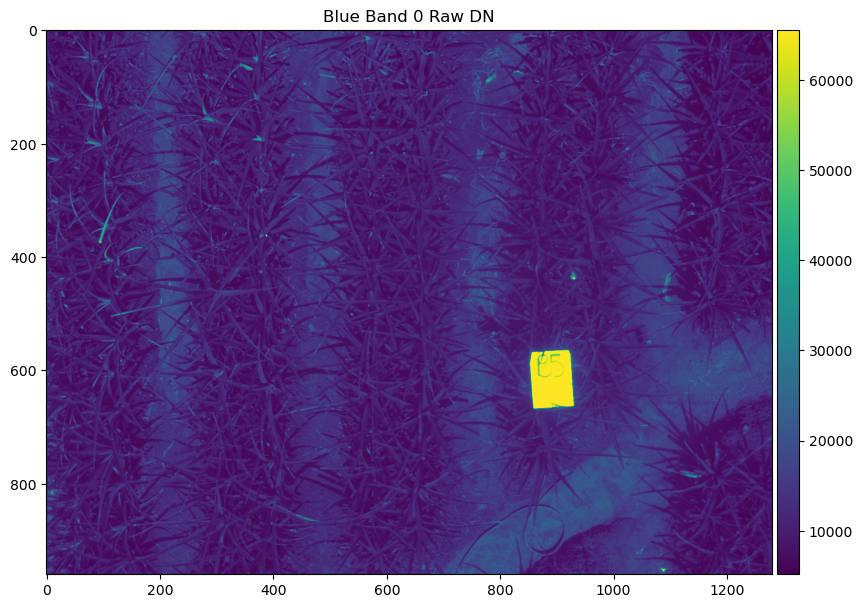

In [13]:
from micasense.image import Image

imagePath = os.path.join('.','Data','B5T5')
datos=imagePath.split('\\')
fecha=datos[len(datos)-2]
carpeta=datos[len(datos)-1]
imageName = glob.glob(os.path.join(imagePath,'IMG_0068_1.tif'))[0]   
panelNames = glob.glob(os.path.join(imagePath,'panel_1.tif'))[0] 

img = Image(imageName)
img.plot_raw(figsize=(8.73,8.73));

Detected panel serial: RP02-1618086-SC
Extracted Panel Statistics:
Mean: 44794.39809969706
Standard Deviation: 796.9972823971316
Panel Pixel Count: 14524
Saturated Pixel Count: 0


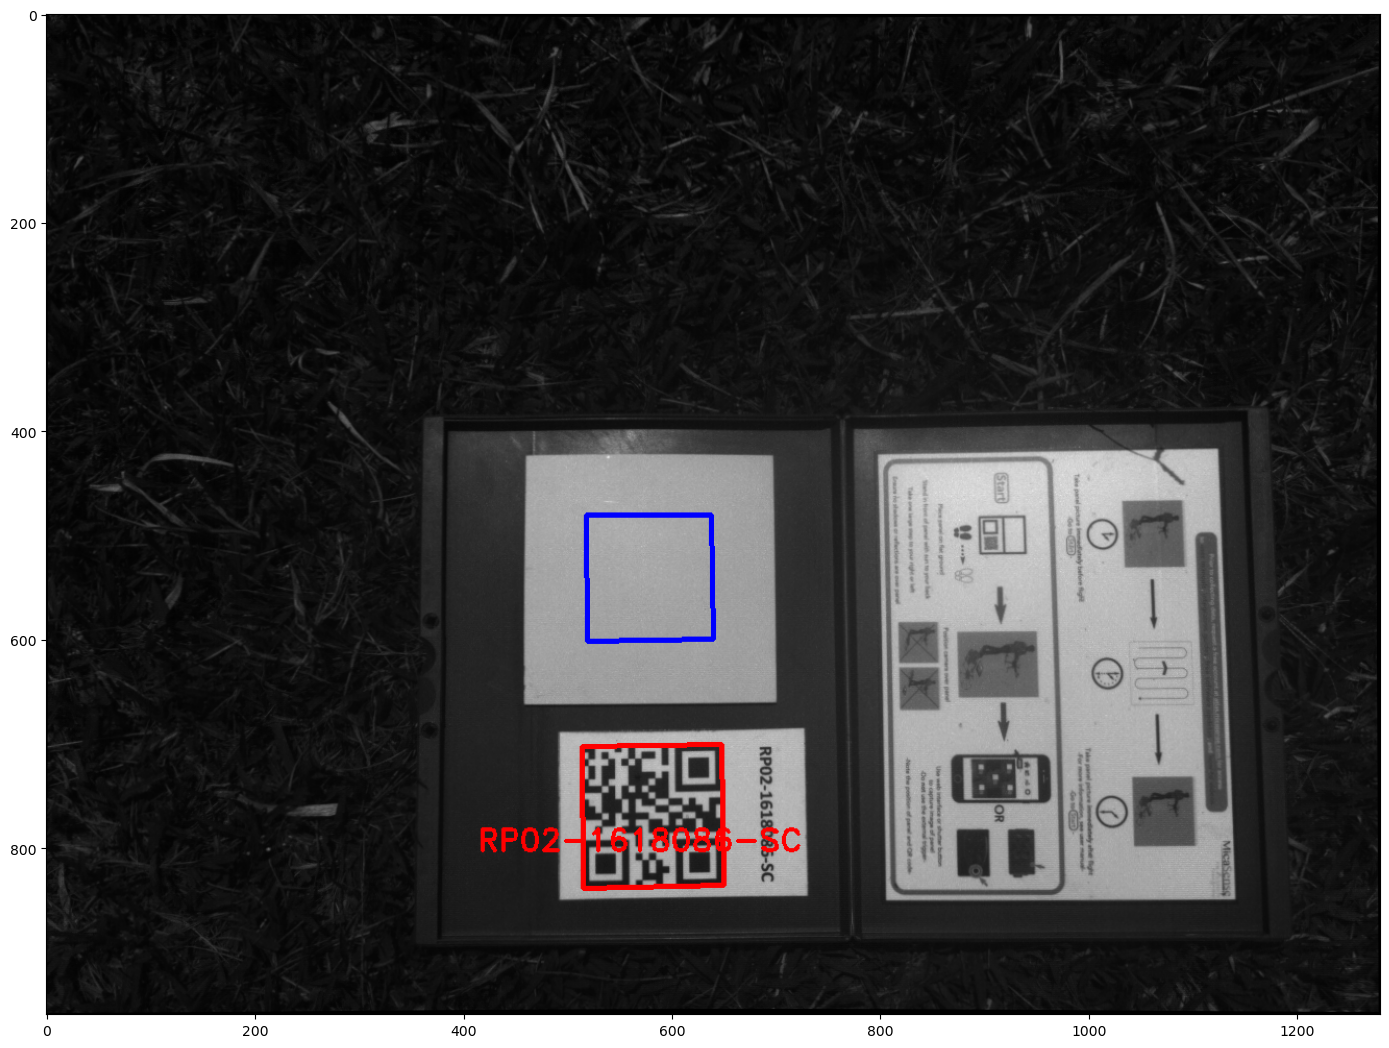

In [14]:
from micasense.panel import Panel


img = Image(panelNames)
panel = Panel(img)

if not panel.panel_detected():
    raise IOError("Panel Not Detected!")
    
print("Detected panel serial: {}".format(panel.serial))
mean, std, num, sat_count = panel.raw()
print("Extracted Panel Statistics:")
print("Mean: {}".format(mean))
print("Standard Deviation: {}".format(std))
print("Panel Pixel Count: {}".format(num))
print("Saturated Pixel Count: {}".format(sat_count))

panel.plot();